## Using scikit-learn built-in GMM module

In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import scipy as sp
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import mixture

from EM import EM

%matplotlib inline

In [2]:
# read the image
img = plt.imread('./corgi.png')[:, :, :3]

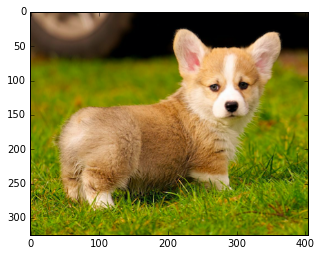

In [9]:
plt.imshow(img)
plt.show()

In [4]:
# define colors in a hash table
colors = {1: 'b', 2: 'g', 3: 'r', 4: 'c', 5: 'm', 6: 'y', 7: 'k', 8: 'w', 9: '#FFA500', 10: '#006400'}

In [5]:
# reshape the input vector
x = np.reshape(img, (-1, 3))

In [17]:
m = 3
gmm = mixture.GMM(m, covariance_type='full').fit(x)

label = gmm.predict(x) + 1

In [18]:
print('w:\t', np.round(gmm.weights_, 5))
print('\nmu:\t', np.round(gmm.means_, 5))
print('\nsigma:\t', np.round(gmm.covars_, 5))

w:	 [ 0.33588  0.21872  0.4454 ]

mu:	 [[ 0.75924  0.59866  0.41075]
 [ 0.15978  0.11972  0.05998]
 [ 0.44383  0.4998   0.00779]]

sigma:	 [[[ 0.02129  0.02026  0.02334]
  [ 0.02026  0.02458  0.02731]
  [ 0.02334  0.02731  0.03723]]

 [[ 0.03074  0.02084  0.01083]
  [ 0.02084  0.01636  0.00769]
  [ 0.01083  0.00769  0.00623]]

 [[ 0.01033  0.00566  0.00024]
  [ 0.00566  0.00692  0.00016]
  [ 0.00024  0.00016  0.00153]]]


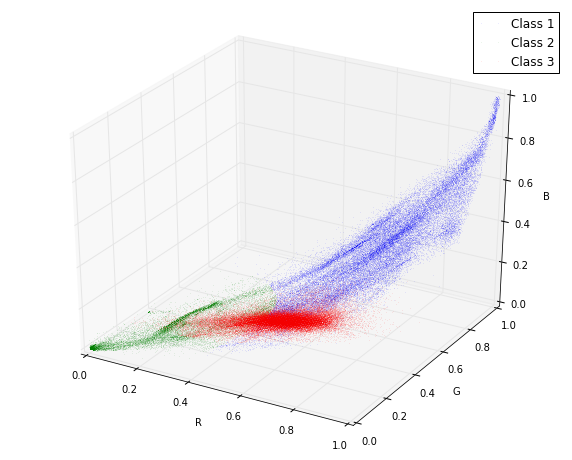

In [21]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in range(1, m + 1):
    data = x[label == i]
    ax.plot(data[:, 0], data[:, 1], data[:, 2], '.', color=colors[i], 
            markersize=0.1, label='Class ' + str(i))
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.legend()
plt.show()

In [24]:
gmm.score(x)

array([ 0.95471858,  1.51655232,  1.8809968 , ...,  3.39082141,
        3.5397796 ,  3.79754454])

In [25]:
gmm.predict_proba(x)

array([[  9.99088524e-01,   9.11476111e-04,   1.53361410e-19],
       [  9.99788589e-01,   2.11411493e-04,   1.81840544e-21],
       [  9.99973853e-01,   2.61468266e-05,   7.92412479e-25],
       ..., 
       [  4.39077702e-08,   5.83647789e-09,   9.99999950e-01],
       [  2.73876072e-08,   1.34328465e-09,   9.99999971e-01],
       [  1.95241296e-08,   2.32462433e-10,   9.99999980e-01]])